In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition
import seaborn as sns

data = np.load('/Users/alexjizdan/Downloads/MLProject2024/fashion_train.npy')

print("Shape of the data:", data.shape)

images = data[:, :-1] 
labels = data[:, -1]  


print("Shape of images:", images.shape)
data[:10]

Shape of the data: (10000, 785)
Shape of images: (10000, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

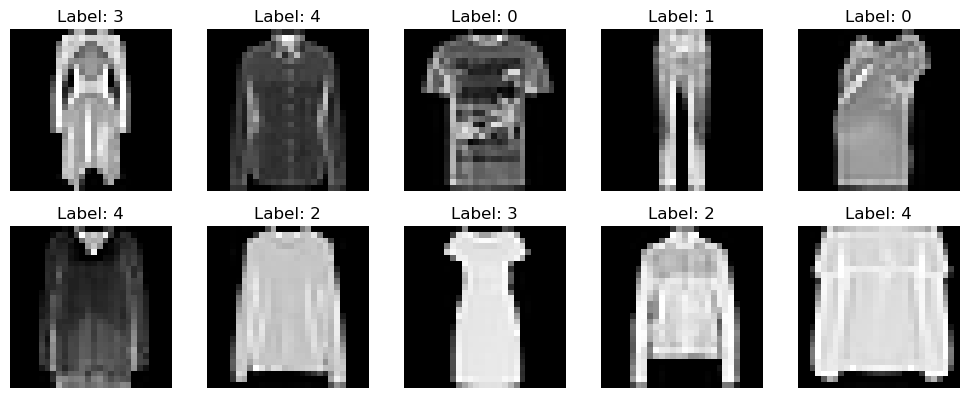

In [4]:
def plot_sample_images(images, labels, num_samples=10):
    random_indices = np.random.choice(images.shape[0], num_samples, replace=False) 

    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(5, 5, i + 1)  
        plt.imshow(images[random_indices[i]].reshape(28, 28), cmap='gray')  
        plt.title(f'Label: {labels[random_indices[i]]}') 
        plt.axis('off')
    plt.tight_layout()
    plt.show()


plot_sample_images(images, labels)

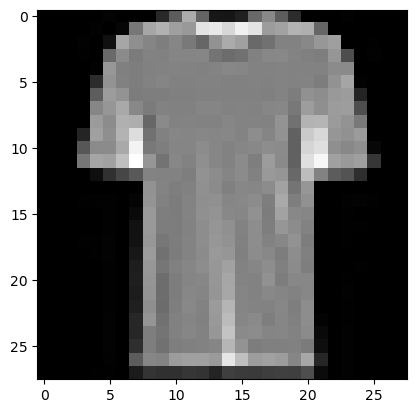

In [11]:
curr_img = np.reshape(data[0][:-1], (28,28))
plt.imshow(curr_img, cmap=plt.cm.gray);

In [8]:
train_df = pd.DataFrame(data)
class_mapping = {0:'Top',1:'Trouser',2:'Pullover',3:'Dress',4:'Shirt'}
train_df.iloc[:,-1].replace(class_mapping, inplace=True)

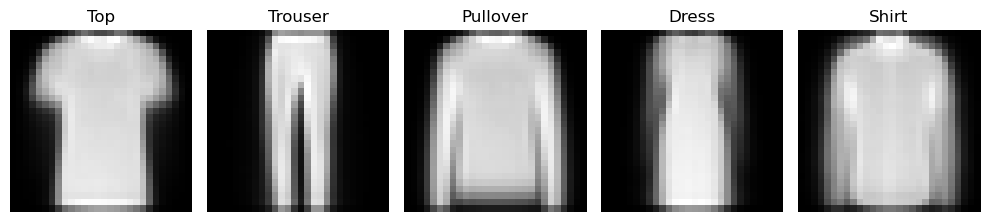

In [9]:
mean_images = []
for label in range(5):
    mean_image = np.mean(images[labels == label], axis=0).reshape(28, 28)
    mean_images.append(mean_image)

plt.figure(figsize=(10, 8))
for i, mean_image in enumerate(mean_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(class_mapping[i])
    plt.axis('off') 
plt.tight_layout()
plt.show()

In [10]:
mean = np.mean(data)
median = np.median(data)
minn = np.min(data)
maxx = np.max(data)
std = np.std(data)
print(f"{mean}, {median}, {minn}, {maxx}, {std}")

76.93116420382165, 14.0, 0, 255, 89.97942562765583


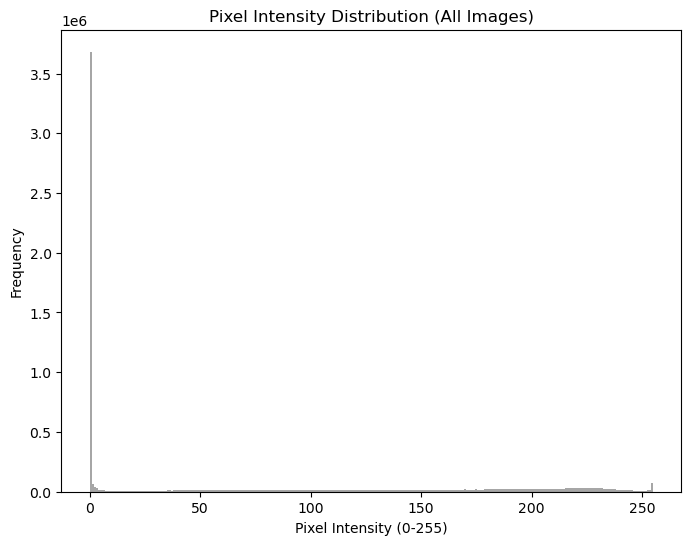

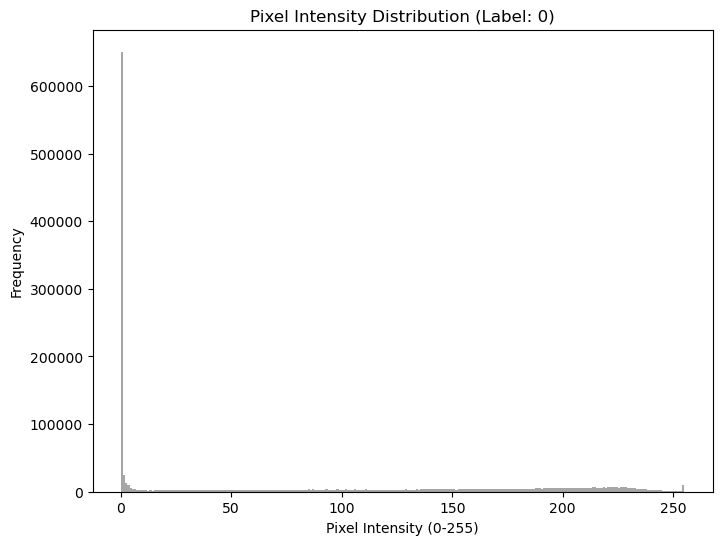

In [12]:
def plot_intensity_histogram(images, labels=None, label=None, bins=256):
    if label is not None:
        images = images[labels == label]
    
    all_pixels = images.flatten()

    plt.figure(figsize=(8, 6))
    plt.hist(all_pixels, bins=bins, color='gray', alpha=0.7)
    plt.title(f'Pixel Intensity Distribution (Label: {label})' if label is not None else 'Pixel Intensity Distribution (All Images)')
    plt.xlabel('Pixel Intensity (0-255)')
    plt.ylabel('Frequency')
    plt.show()

plot_intensity_histogram(images)

plot_intensity_histogram(images, labels=labels, label=0)

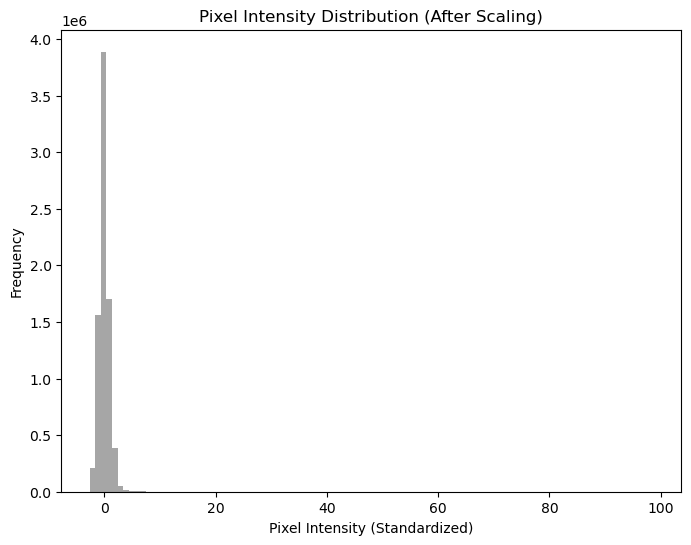

In [13]:
x = train_df.loc[:, :783].values
x = preprocessing.StandardScaler().fit_transform(x)
x.shape

flattened_scaled_pixels = x.flatten()

plt.figure(figsize=(8, 6))
plt.hist(flattened_scaled_pixels, bins=100, color='gray', alpha=0.7)
plt.title('Pixel Intensity Distribution (After Scaling)')
plt.xlabel('Pixel Intensity (Standardized)')
plt.ylabel('Frequency')
plt.show()

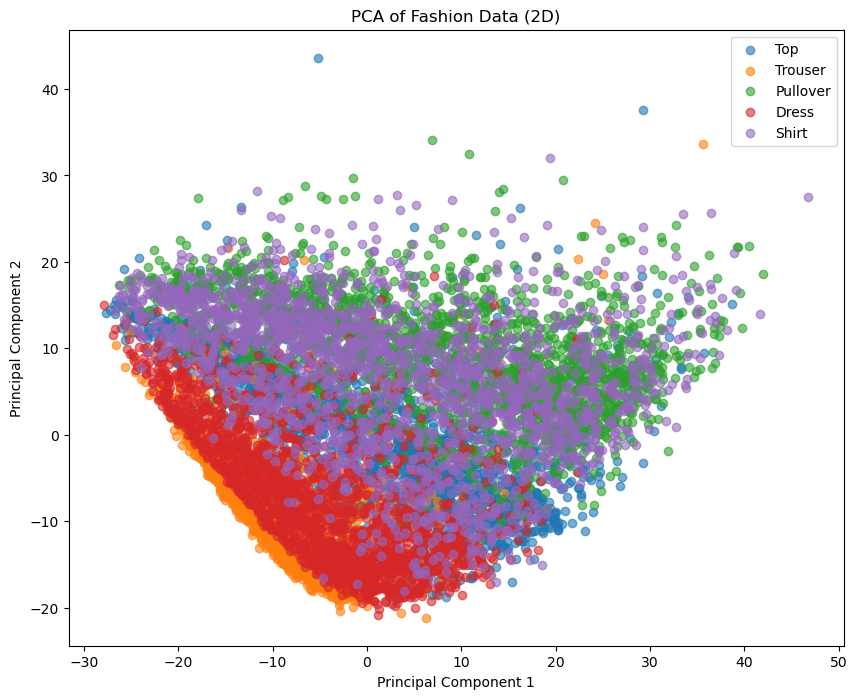

In [32]:
pca = decomposition.PCA()
pca_train = pca.fit_transform(x)

plt.figure(figsize=(10, 8))

for label in np.unique(labels):
    plt.scatter(pca_train[labels == label, 0], pca_train[labels == label, 1], 
                label=class_mapping[label], alpha=0.6)

plt.title('PCA of Fashion Data (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [29]:
print(pca.components_[:10])

[[ 5.82637305e-04  2.30631247e-03  2.34926124e-03 ...  1.33195002e-02
   5.81313508e-03  1.05615622e-03]
 [ 9.84719199e-05  2.29457213e-03  5.69148192e-03 ...  2.04898046e-02
   1.15426244e-02  5.48839695e-03]
 [ 2.67124552e-03  1.05684466e-02  2.12765921e-02 ...  1.50343917e-03
   8.26990505e-03  6.90042583e-03]
 ...
 [ 1.16550288e-02  1.50928886e-02  7.27539697e-02 ...  4.06647203e-02
   4.09376326e-02  3.89489033e-02]
 [ 9.23812166e-03  1.55193410e-03  3.31504832e-02 ...  7.72038486e-03
  -1.42891657e-02 -6.12657394e-03]
 [ 3.23172510e-02  2.92877030e-02  8.44633990e-02 ... -2.67592412e-02
  -1.26700156e-03  3.89846291e-02]]


In [30]:
print(sum(pca.explained_variance_ratio_[:10]))
print(pca.explained_variance_ratio_[:10])

0.6070046677611977
[0.22645698 0.13673557 0.06381166 0.05046707 0.03064291 0.02924805
 0.02197067 0.01880203 0.0147053  0.01416444]


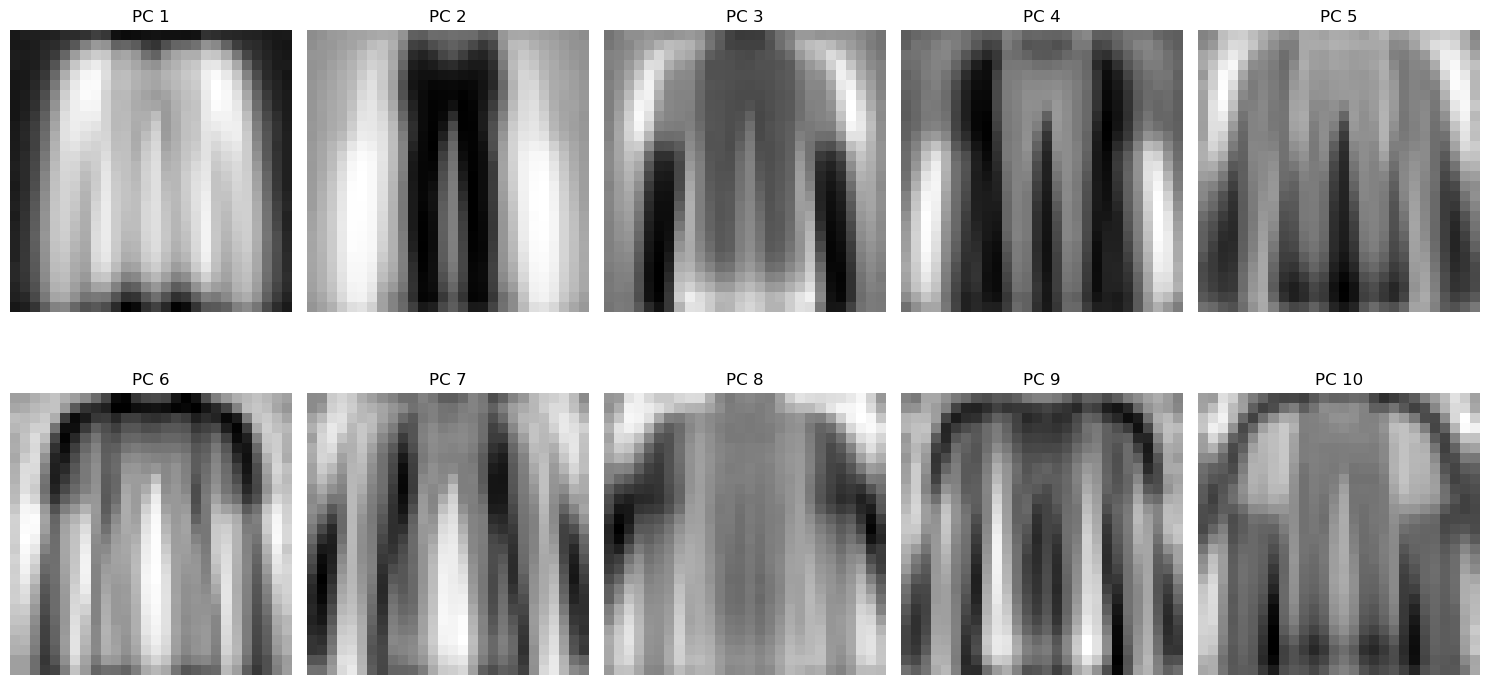

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    plt.title(f'PC {i + 1}')
    plt.axis('off')
plt.tight_layout()
plt.show()


/Users/alexjizdan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


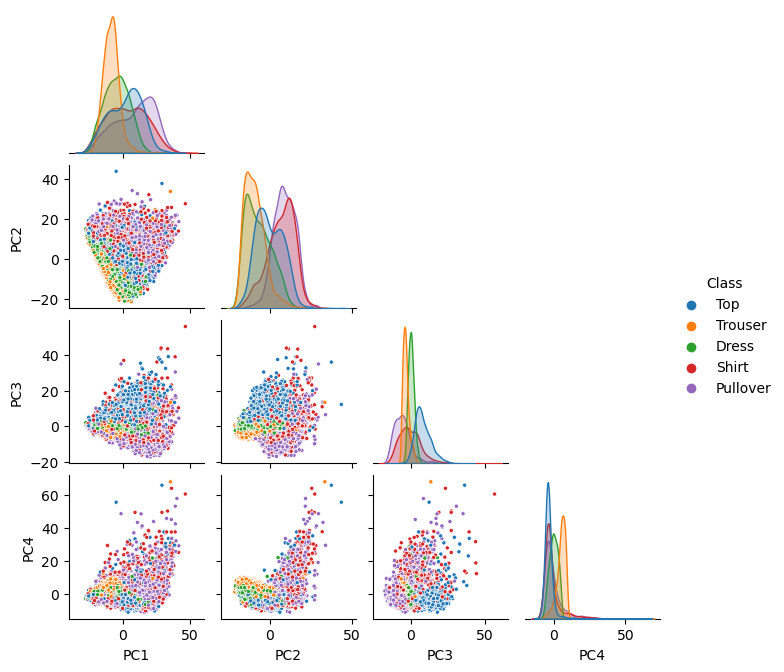

In [38]:
pc_labels = ['PC' + str(a) for a in range(1, len(pca_train[0])+1)]
pca_df = pd.DataFrame(pca_train, columns = pc_labels)

y = train_df.iloc[:,-1]

pca_4 = pca_df.copy()
pca_4 = pca_4[['PC1','PC2','PC3','PC4']]
pca_4['Class'] = y.reset_index(drop=True) 

sns.pairplot(data=pca_4,hue='Class',corner=True, markers = '.',height=1.7)
plt.show()